In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

## EXERCISE

Use famous iris flower dataset from sklearn.datasets to predict flower species using random forest classifier.

Measure prediction score using default n_estimators (10)
Now fine tune your model by changing number of trees in your classifer and tell me what best score you can get using how many trees

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
from sklearn.datasets import load_iris

data = load_iris()
dir(data)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [8]:
df = pd.DataFrame(data.data)
df['target'] = data.target

df.sample(10)

,0,1,2,3,target
136,6.3,3.4,5.6,2.4,2
84,5.4,3.0,4.5,1.5,1
66,5.6,3.0,4.5,1.5,1
58,6.6,2.9,4.6,1.3,1
64,5.6,2.9,3.6,1.3,1
75,6.6,3.0,4.4,1.4,1
18,5.7,3.8,1.7,0.3,0
134,6.1,2.6,5.6,1.4,2
0,5.1,3.5,1.4,0.2,0
126,6.2,2.8,4.8,1.8,2


In [9]:
X = df.drop(columns = ['target'])
y = df['target']

X.shape, y.shape

((150, 4), (150,))

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =  0.2, random_state = 42)

X_train.shape, y_train.shape

((120, 4), (120,))

In [12]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators = 10)

model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=10)

In [13]:
model.score(X_test, y_test)

1.0

In [15]:
y_pred = model.predict(X_test)
y_test[:5], y_pred[:5]

(73     1
 18     0
 118    2
 78     1
 76     1
 Name: target, dtype: int64,
 array([1, 0, 2, 1, 1]))

In [16]:
import pickle
import joblib

with open("model_pickle", 'wb') as f:
    pickle.dump(model, f)


In [17]:
with open("model_pickle", 'rb') as f:
    model_1 = pickle.load(f)

In [18]:
joblib.dump(model, "model_joblib")

['model_joblib']

In [19]:
model_2 = joblib.load("model_joblib")

In [20]:
from sklearn.metrics import confusion_matrix, classification_report

cr = classification_report(y_test, y_pred)

print(cr)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



Text(50.722222222222214, 0.5, 'Actual')

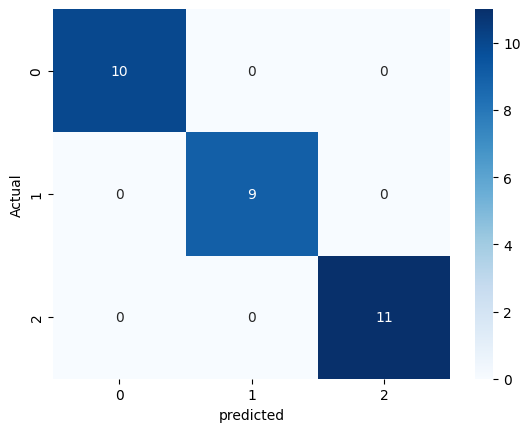

In [21]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, cmap = "Blues", annot = True)
plt.xlabel("predicted")
plt.ylabel("Actual")